In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [2]:

df=pd.read_csv('Appointment-No-Show-Data.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

Ques 1. Checking Unique Patients

In [4]:
unique_patients=df.PatientId.unique()
print(unique_patients.size)

62299


There are 62299 unique patients in the data.

Ques 2. Categorizing Age group in Age_cat

In [96]:
df['Age_cat'] = 'x'
df.loc[(df['Age'] > 0) & (df['Age'] < 18), 'Age_cat'] = 'Kids'
df.loc[(df['Age'] >= 18) & (df['Age'] < 37), 'Age_cat'] = 'Young Adults'
df.loc[(df['Age'] >= 37) & (df['Age'] < 65), 'Age_cat'] = 'Older Adults'
df.loc[df['Age'] >= 65, 'Age_cat'] = 'Elderly'
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat,WeekdayAppointment,NoShowHistory,AwaitingTime,NoShow_n
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Kids,4,1.0,0 Days,0.0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Elderly,4,0.0,1-4 Days,0.0
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Young Adults,4,1.0,1-4 Days,1.0
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Older Adults,4,2.0,1-4 Days,1.0
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Young Adults,4,0.0,0 Days,0.0
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Young Adults,4,0.0,1-4 Days,0.0


Ques 3. Percentage of patients having multiple appoinments

In [6]:
df_multiple=df.groupby(['PatientId']).size().reset_index()
df_multiple=df_multiple[df_multiple[0]>1]
multiple_appts=(len(df_multiple)/unique_patients.size)*100
print(multiple_appts)

39.13224931379316


Q-3. 39.13% of the Patients had multiple appointments

In [7]:
df_multiple

,PatientId,0
7,22638656,2
8,52168938,2
12,64851211,2
14,79228495,2
16,87996454,2
19,122451254,2
21,142133299,2
22,156223164,2
23,178168233,2
25,188964456,3


In [8]:
df2=df.merge(df_multiple, how='left', on='PatientId')
df2=df2[df2[0].notnull()]

In [9]:
df2

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat,0
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older Adults,2.0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older Adults,2.0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older Adults,2.0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Kids,2.0
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Elderly,2.0
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Older Adults,2.0
13,911394617215919,5636249,M,2016-04-28 14:52:07,2016-04-29,28,NOVA PALESTINA,0,0,0,0,0,0,No,Young Adults,2.0
20,622257462899397,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,Young Adults,2.0
21,12154843752835,5628338,F,2016-04-27 10:50:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes,Kids,6.0
23,213753979425692,5634142,F,2016-04-28 10:27:05,2016-04-29,46,CONQUISTA,0,0,0,0,0,0,No,Older Adults,3.0


In [10]:
df3=df2.groupby(['PatientId','No-show']).size().reset_index()

In [11]:
multiples_gone_to_allappts=(len(df3[df3['No-show']=='No'])/(len(df_multiple)))*100
print(multiples_gone_to_allappts)

95.7873579720251


Q-4. 95.78% of the patients with multiple appointments have gone to all their appointments.

In [12]:
df['WeekdayAppointment']=df['AppointmentDay'].dt.dayofweek

In [13]:
df4=df.groupby(['WeekdayAppointment','No-show']).count().reset_index()
df4[df4['No-show']=='Yes']

,WeekdayAppointment,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Age_cat
1,0,Yes,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690
3,1,Yes,5152,5152,5152,5152,5152,5152,5152,5152,5152,5152,5152,5152,5152,5152
5,2,Yes,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093
7,3,Yes,3338,3338,3338,3338,3338,3338,3338,3338,3338,3338,3338,3338,3338,3338
9,4,Yes,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037
11,5,Yes,9,9,9,9,9,9,9,9,9,9,9,9,9,9


Q-5. Thus we see that Weekday 1: Tuesday is when most people missed their appointments.

In [14]:
df_noshow=df[df['No-show']=='Yes']
df_noshow=df_noshow[['PatientId','No-show']]
df_noshow=df_noshow.groupby('PatientId').size().reset_index()
df_noshow=df_noshow.rename(columns={0:'NoShowHistory'})
df_noshow

,PatientId,NoShowHistory
0,5628261,1
1,64851211,1
2,87996454,1
3,122451254,2
4,142133299,1
5,179874775,1
6,215778678,1
7,251541539,1
8,342478778,1
9,355744126,1


In [15]:
df=df.merge(df_noshow, how='left', on='PatientId')
df['NoShowHistory']=df['NoShowHistory'].fillna(0)

Q-6. Dataframe with NoShowHistory column

In [16]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat,WeekdayAppointment,NoShowHistory
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older Adults,4,0.0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older Adults,4,0.0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older Adults,4,0.0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Kids,4,1.0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older Adults,4,0.0
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Elderly,4,0.0
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Young Adults,4,1.0
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Older Adults,4,2.0
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Young Adults,4,0.0
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Young Adults,4,0.0


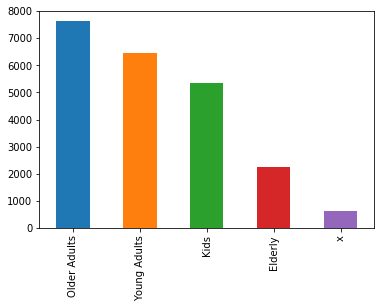

In [17]:
df[df['No-show']=='Yes'].Age_cat.value_counts().plot(kind='bar')

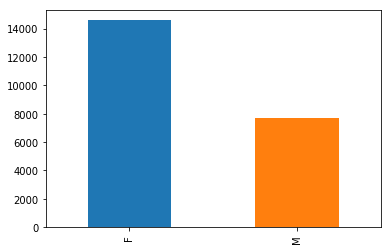

In [18]:
df[df['No-show']=='Yes'].Gender.value_counts().plot(kind='bar')

Q-7. From above graphs we can see that Older Adults and Females are most likely to miss an appointment.

In [19]:
df['ScheduledDay']=df['ScheduledDay'].dt.normalize()
df['Awaiting_Time']=df['AppointmentDay']-df['ScheduledDay']

In [20]:
df['Awaiting_Time']=df['Awaiting_Time'].dt.days

In [21]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat,WeekdayAppointment,NoShowHistory,Awaiting_Time
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older Adults,4,0.0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older Adults,4,0.0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older Adults,4,0.0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Kids,4,1.0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older Adults,4,0.0,0
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Elderly,4,0.0,2
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Young Adults,4,1.0,2
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Older Adults,4,2.0,2
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Young Adults,4,0.0,0
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Young Adults,4,0.0,2


In [22]:
df.loc[df['Awaiting_Time'] == 0, 'AwaitingTime'] = '0 Days'
df.loc[(df['Awaiting_Time'] >= 1) & (df['Awaiting_Time'] <= 4), 'AwaitingTime'] = '1-4 Days'
df.loc[(df['Awaiting_Time'] >= 5) & (df['Awaiting_Time'] <= 15), 'AwaitingTime'] = '5-15 Days'
df.loc[df['Awaiting_Time'] >= 16, 'Awaiting_Time'] = '16+ Days'
df.drop('Awaiting_Time',axis='columns', inplace=True)

Q-8. DataFrame with column Awaiting Time Categorized

In [40]:
df.loc[df['No-show']=='Yes','NoShow_n']=1
df.loc[df['No-show']=='No','NoShow_n']=0

In [41]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat,WeekdayAppointment,NoShowHistory,AwaitingTime,NoShow_n
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Kids,4,1.0,0 Days,0.0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older Adults,4,0.0,0 Days,0.0
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Elderly,4,0.0,1-4 Days,0.0
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Young Adults,4,1.0,1-4 Days,1.0
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Older Adults,4,2.0,1-4 Days,1.0
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Young Adults,4,0.0,0 Days,0.0
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Young Adults,4,0.0,1-4 Days,0.0


In [24]:
samedayschedule=(len(df[df['AwaitingTime']=='0 Days'])/len(df))*100
print(samedayschedule)

34.890117346892616


In [25]:
samedayshow=(len(df[(df['AwaitingTime']=='0 Days') & (df['No-show']=='No')])/len(df[df['AwaitingTime']=='0 Days']))*100
print(samedayshow)

95.35305863133054


Q-9 34.89% of all patients scheduled on the same day as their appointment. Out of those 95.35% showed up for their appointments.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


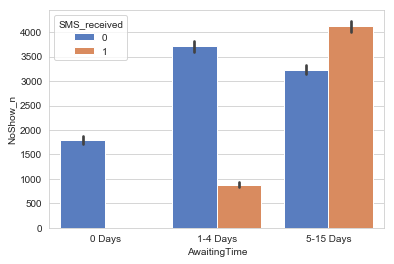

In [42]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set_style("whitegrid")
sns.barplot(x="AwaitingTime", y="NoShow_n", hue="SMS_received", data=df, palette='muted', estimator=sum)
plt.show()

Q-10. The SMS helped to considerably improve the no of patient shows in the 1-4 days category but not so much in other categories.

In [47]:
df.dtypes

PatientId                      int64
AppointmentID                  int64
Gender                        object
ScheduledDay          datetime64[ns]
AppointmentDay        datetime64[ns]
Age                            int64
Neighbourhood                 object
Scholarship                    int64
Hipertension                   int64
Diabetes                       int64
Alcoholism                     int64
Handcap                        int64
SMS_received                   int64
No-show                       object
Age_cat                       object
WeekdayAppointment             int64
NoShowHistory                float64
AwaitingTime                  object
NoShow_n                     float64
dtype: object

In [60]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WeekdayAppointment,NoShowHistory,NoShow_n
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001685,-0.002279,-0.001461
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.053292,-0.032499,-0.162602
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.003088,-0.045118,-0.060319
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.000673,0.055314,0.029135
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.003455,-0.028408,-0.035701
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.006614,-0.014899,-0.015180
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.002701,0.013697,-0.000196
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.004352,0.024927,-0.006076
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.089858,0.012383,0.126431
WeekdayAppointment,-0.001685,-0.053292,0.003088,-0.000673,0.003455,0.006614,0.002701,0.004352,-0.089858,1.000000,0.015610,0.001165


Q-11. From the above correlation values the variable Hipertension, Diabetes, Alcoholism, Handcap are not correlated to No-Show

In [70]:
df.groupby(['Neighbourhood']).mean()['NoShow_n'].sort_values(ascending=False)

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
JESUS DE NAZARETH              0.243954
HORTO                          0.240000
ILHA DO PRÍNCIPE               0.234775
CARATOÍRA                      0.230409
ANDORINHAS                     0.230327
PRAIA DO SUÁ                   0.228261
GURIGICA                       0.225966
BENTO FERREIRA                 0.224942
PARQUE MOSCOSO                 0.223192
MARUÍPE                        0.222923
DO MOSCOSO                     0.222760
ENSEADA DO SUÁ                 0.221277
ARIOVALDO FAVALESSA            0.219858
ILHA DAS CAIEIRAS              0.219421
FONTE GRANDE                   0.218475
CRUZAMENTO                     0.217454
SÃO JOSÉ                       0.216490
BARRO VERMELHO                 0.215130
NAZARETH                       0.214815
ROMÃO                     

Neighborhood = 'ILHAS OCEÂNICAS DE TRINDADE' has most number of no show rate

In [95]:
df[['Neighbourhood','Scholarship', 'NoShow_n']].groupby('Neighbourhood').agg({'Scholarship':'sum','NoShow_n':'mean'}).sort_values('Scholarship', ascending=False)

,Scholarship,NoShow_n
Neighbourhood,,
ILHA DO PRÍNCIPE,579,0.234775
TABUAZEIRO,537,0.182950
RESISTÊNCIA,468,0.204469
CARATOÍRA,456,0.230409
SANTA MARTHA,441,0.158416
GURIGICA,422,0.225966
SÃO BENEDITO,404,0.199444
BONFIM,373,0.198341
SANTO ANDRÉ,334,0.197588


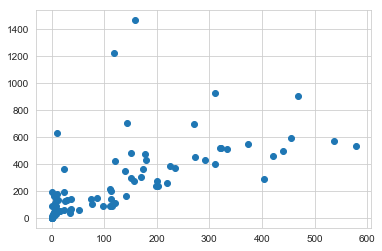

In [91]:
plt.scatter('Scholarship','NoShow_n', data=df_nh)

From the plot and grouping by, it seems there are not much evidences to prove neighborhoods with more scholarship patients are more likely to not show up.